# Exercise 1

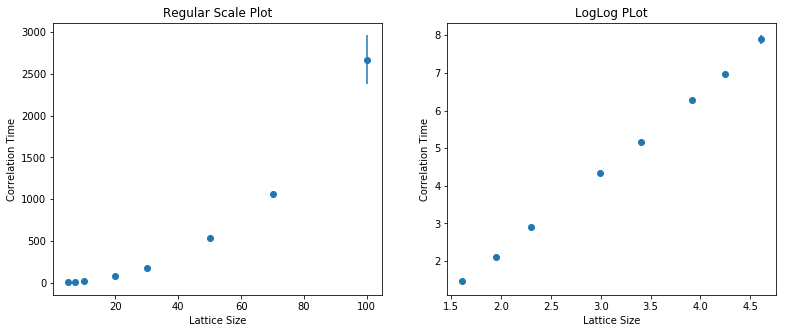

In [1]:
%matplotlib inline
import numpy as np 
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.special import gammaincc

#Import data and create variables to the corresponding values
#Legend: Lattice Size; Correlation Time; Error on Time
rawData = open("power_law_data.txt")
powData = rawData.readlines()
data = powData
rawData.close()
lattice = []
tauTime = []
tauErr = []

#Plots for data
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

#Loop to append data to the appropriate indeces
for i in range(len(powData)):
    powData = data[i]
    rows = powData.split(' ')
    lattice.append(float(rows[0]))
    tauTime.append(float(rows[1]))
    tauErr.append(float(rows[2]))
    

#Making the data for later use
arrayLattice = np.array(lattice)
arrayTauTime = np.array(tauTime)
arrayTauErr = np.array(tauErr)
logLattice = np.log(arrayLattice)
logTauTime = np.log(arrayTauTime)
corrErr = np.array(tauErr)/np.array(tauTime)

#Plot for regular data
ax1.errorbar(lattice, tauTime, yerr = tauErr, fmt = 'o')
ax1.set_xlabel("Lattice Size")
ax1.set_ylabel("Correlation Time")
ax1.set_title("Regular Scale Plot")

#Log Log PLot
ax2.errorbar(logLattice, logTauTime, yerr = corrErr, fmt = 'o')
ax2.set_xlabel("Lattice Size")
ax2.set_ylabel("Correlation Time")
ax2.set_title("LogLog PLot")
plt.show()

In [63]:
#Linear least square fit
def chisq(params):
    a, b = params
    return np.sum( (a + b*logLattice - logTauTime)**2/corrErr**2 )

initialGuess = [8,1]
minimize(chisq,initialGuess)

      fun: 6.7613168452711765
 hess_inv: array([[ 8.45075132e-04, -2.76249321e-04],
       [-2.76249321e-04,  9.68234177e-05]])
      jac: array([0.00000000e+00, 7.80820847e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([-1.96051826,  2.10468649])

In [64]:
#Goodness of fit measures
dof = len(powData) - 2
chisq_min = minimize(chisq, initialGuess).fun

print("chisq_min/dof = ", chisq_min/dof)
print("Q = ", gammaincc(dof/2, chisq_min/2), "A good fit because Q is less than 1")

chisq_min/dof =  0.4829512032336555
Q =  0.9435214853521183 A good fit because Q is less than 1


In [78]:
#Analytical data fits
S = np.sum(1/corrErr/corrErr)
Sx = np.sum(logLattice/corrErr/corrErr)
Sy = np.sum(logTauTime/corrErr/corrErr)
t = (logLattice-Sx/S)/corrErr
Stt = np.sum(t*t)
b = np.sum(t*logTauTime/corrErr)/Stt
a = (Sy-Sx*b)/S
error_on_a = np.sqrt((1+Sx*Sx/S/Stt)/S)
error_on_b = np.sqrt(1/Stt)
print("a = ", a, "+-", error_on_a, "\nb =", b, "+-", error_on_b,'\n')
print("'a' and 'b' values respectivly:")
print('[ %.8f' % a, '%.8f' % b, ']')

a =  -1.9605184613947975 +- 0.041111438231996304 
b = 2.1046865695966965 +- 0.013915705081256028 

'a' and 'b' values respectivly:
[ -1.96051846 2.10468657 ]


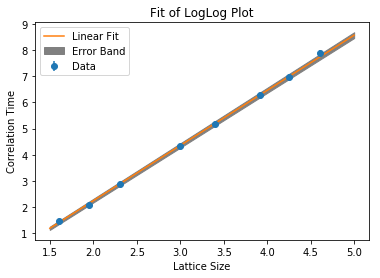

In [86]:
#Plot of LogLog Data and best fit

#Function for error band
def linFit(a,b,x):
   return b*x+a

plt.errorbar(logLattice, logTauTime, yerr = corrErr, fmt = 'o', label="Data")
bestFit = minimize(chisq, initialGuess).x
x_for_plot = np.linspace(1.5, 5, 100)
plt.plot(x_for_plot, bestFit[0] + bestFit[1]*x_for_plot, label="Linear Fit")
plt.fill_between(x_for_plot, linFit(a+error_on_a,b+error_on_b,x_for_plot),linFit(a-error_on_a,b-error_on_b,x_for_plot), color='gray', label="Error Band")
plt.title("Fit of LogLog Plot")
plt.xlabel("Lattice Size")
plt.ylabel("Correlation Time")
plt.legend(loc="upper left")
plt.show()

In [87]:
#Curve fit of data
def powFunc(x, a, b):
    return b*x**a

x4Plot = np.linspace(0, 110, 1000)
popt, pcov = curve_fit(powFunc, arrayLattice, arrayTauTime, sigma = arrayTauErr, absolute_sigma=True)

print("Curve fit parameters: ", popt)
print("Errors on fit parameters: ", [b,np.exp(a)])

Curve fit parameters:  [2.10436646 0.14075668]
Errors on fit parameters:  [2.1046865695966965, 0.14078541019592195]


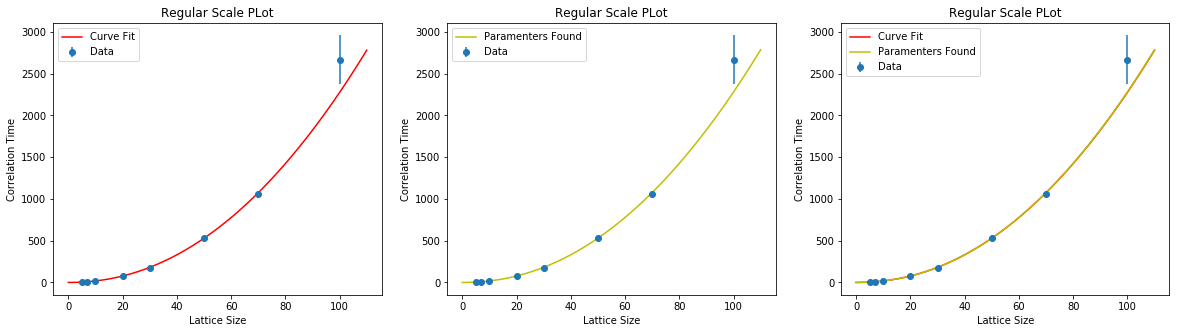

In [88]:
#Plot all the data together
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#Plot for first graph from curve fit
ax1.errorbar(lattice, tauTime, yerr = tauErr, fmt = 'o', label='Data')
ax1.plot(x4Plot, powFunc(x4Plot, popt[0]*np.ones(1000), popt[1]*np.ones(1000)), 'r-', label='Curve Fit')
ax1.set_xlabel("Lattice Size")
ax1.set_ylabel("Correlation Time")
ax1.set_title("Regular Scale PLot")
ax1.legend(loc="upper left")

#Plot for second graph from values found for (a) and (b)
ax2.errorbar(lattice, tauTime, yerr = tauErr, fmt = 'o', label='Data')
ax2.plot(x4Plot, powFunc(x4Plot, b, np.exp(a)), 'y-', label='Paramenters Found')
ax2.set_xlabel("Lattice Size")
ax2.set_ylabel("Correlation Time")
ax2.set_title("Regular Scale PLot")
ax2.legend(loc="upper left")

#Third graph of the two overlayed
ax3.errorbar(lattice, tauTime, yerr = tauErr, fmt = 'o', label='Data')
ax3.plot(x4Plot, powFunc(x4Plot, popt[0]*np.ones(1000), popt[1]*np.ones(1000)), 'r-', label='Curve Fit')
ax3.plot(x4Plot, powFunc(x4Plot, b, np.exp(a)), 'y-', label='Paramenters Found')
ax3.set_xlabel("Lattice Size")
ax3.set_ylabel("Correlation Time")
ax3.set_title("Regular Scale PLot")
ax3.legend(loc="upper left")

plt.show()

# Exercise 2

In [102]:

####################################################################################
#                         EVERYTHING BELOW IS BACKUP                               #
####################################################################################

#leastRawData.columns = ['xData','yData','sigmay']
#leastSquareData = leastRawData.readlines()
#leastData = leastSquareData
#leastRawData.close()
# xData = []
# yData = []
# sigmay = []

# for i in range(len(leastSquareData)):
#     leastSquareData = leastData[i]
#     rows = leastSquareData.split(' ')
#     xData.append(float(rows[0]))
#     yData.append(float(rows[1]))
#     sigmay.append(float(rows[2]))

####################################################################################


In [4]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.special import gammaincc
import scipy.linalg as la
import pandas as pd

leastSquareData = pd.read_csv('general_llsq_data.dat', sep=' ', names=['x','y','yError'])
xData = np.array(leastSquareData.x)
yData = np.array(leastSquareData.y)
sigmay = np.array(leastSquareData.yError)
matrix = pd.DataFrame.to_numpy(leastSquareData)

print('Dimensions of design matrix:',matrix.shape,'\n')

Dimensions of design matrix: (100, 3) 



In [3]:
#Perform SVD
u,s,vh = la.svd(matrix)
print(s,'\nThe value',max(s),'should be removed\n')

#Ratio of max and min values of (s)
print('Ratio of the min and max values of (s):',min(s)/max(s))

[37.20169396  1.83186703  0.85900506] 
The value 37.20169395542925 should be removed

Ratio of the min and max values of (s): 0.023090482377305162


In [23]:
#Function for parameters
def general_f(params):
    a1,a2,a3,a4 = params
    return a1 + a2*x + a3*x*x + a4*x*x*x

#Function for chi
def chisq2(params):
    a,b,c,d = params
    return np.sum( (a + b*x + c*x*x - general_f(params))**2/sigmay**2 )
    U,S,Vh = la.svd(chisq2(params))
    return S


# plt.errorbar(xData, yData, yerr=sigmay, fmt='o', label='Data')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('General Least Square Data')
# plt.legend()
# plt.show()